**1.1. Librerias necesarisa para el desarollo de la practica.**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**1.2.Lectura del fichero csv con los datos historicos de los precios del total activos.**
 * Total de activos denominado 'data'.
 * Omitido la primera linea del csv con skiprows para evitar fallos en los calculos.
 * Cambiado el indice numerico por un indice de los dias.
 * Y se reafirma que es un formato de fecha en python.


In [ ]:
#Selección de Activos
file_path = 'https://github.com/alfonso-santos/Introduccion-a-Python-para-las-Finanzas-2024/raw/main/Modulo_02_Aplicaciones_Financieras/data/sp500_adj_close_2.csv'
data = pd.read_csv(file_path, skiprows=1, index_col="Date", parse_dates=True) #leo csv, salto primera linea, pone la fecha como indice.
data.shape #numero de matriz, filas por columnas
data.head() # para que de las priemras 5 columnas


,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WTW,WY,WYNN,XEL,XOM,XYL,YUM,ZBH,ZBRA,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2018-12-31,64.863556,31.599047,37.750710,70.978325,NaN,65.516487,26.719999,129.915710,226.240005,77.382500,...,140.633057,17.431648,93.774071,41.879677,51.893333,62.420124,83.187721,96.569115,159.229996,82.067696
2019-01-02,63.161682,31.963156,37.793777,68.699387,NaN,62.953068,26.190001,129.528717,224.570007,77.463661,...,138.614212,17.168503,98.978996,40.987179,53.034851,62.223663,82.753326,95.228363,156.240005,81.050751
2019-01-03,60.834824,29.581663,34.029243,66.435822,NaN,59.982052,25.780001,125.106392,215.699997,72.784462,...,135.706406,17.750620,98.021446,40.825672,52.220570,60.090611,80.671799,93.505936,146.880005,78.249268
2019-01-04,62.940529,31.530161,35.481926,68.576187,NaN,61.694016,26.389999,129.970978,226.190002,74.551544,...,139.373642,18.356659,101.974915,41.225182,54.145916,62.625957,82.771423,96.699463,152.970001,81.319374
2019-01-07,64.277046,32.425678,35.402958,69.577080,NaN,62.617935,26.330000,130.422440,229.259995,75.020363,...,140.401596,18.723473,103.785751,41.046677,54.427490,61.699753,82.680916,96.736671,155.289993,81.808678


**1.3.Seleccion de 7 activos del total de activos cuya correlacion maxima entre ellos es menor a 0.6, y mostrar la matriz de correlacion**
 * Definir funcion de seleccion de activos.
 * Generar numero de activos
 * Correlacion menor a 0.6
 * Matriz de correlacion de los activos seleccionados.

In [ ]:
#funcion para seleccionar los activos, que coja la matriz,
def seleccionar_activos(lista_activos: np.ndarray, num_activos: int, replace=False, random_seed:int=10) -> np.ndarray:
    rng = np.random.default_rng(seed=random_seed)
    activos_seleccionados = rng.choice(lista_activos, size=num_activos, replace=replace)
    return activos_seleccionados

num_activos = (10000, 7)
activos_seleccionados = seleccionar_activos(
    lista_activos=data.columns.values,
    num_activos=num_activos,
    replace=True
)

for activos in activos_seleccionados:
  correlation_matrix = data[activos].corr()
  correlation_matrix = np.array(correlation_matrix)
  np.fill_diagonal(correlation_matrix, 0)
  if np.max(correlation_matrix) < 0.6:
    activos_siete = activos
    break
cor_matrix_siete=data[activos_siete].corr()

print(f'Los activos seleccionados son \n{activos_siete}, \ny la matriz de correlacion de dichos activos (Correlacion menor a 0.6) es \n{cor_matrix_siete}')



Los activos seleccionados son 
['SPG' 'CCL' 'HIG' 'ES' 'FTV' 'INTC' 'MRNA'], 
y la matriz de correlacion de dichos activos (Correlacion menor a 0.6) es 
           SPG       CCL       HIG        ES       FTV      INTC      MRNA
SPG   1.000000  0.480093  0.569163 -0.274749  0.506908 -0.100412  0.152806
CCL   0.480093  1.000000 -0.360225 -0.376477 -0.007657  0.448994 -0.444947
HIG   0.569163 -0.360225  1.000000  0.076033  0.523233 -0.478284  0.496376
ES   -0.274749 -0.376477  0.076033  1.000000 -0.070248  0.124958  0.472774
FTV   0.506908 -0.007657  0.523233 -0.070248  1.000000 -0.068693  0.486022
INTC -0.100412  0.448994 -0.478284  0.124958 -0.068693  1.000000 -0.036507
MRNA  0.152806 -0.444947  0.496376  0.472774  0.486022 -0.036507  1.000000


**2.1. Construccion de 10 cartras aleatorias usando los activos seleccionados, asi como sus pesos aleatorios que sumen 1.**
 * Generamos la rentabilidad logaritmica de los activos seleccionados.
 * Generamos una lista de retornos, volatilidades y pesos de los activos.
 * Con todo lo anterior, calculamos la rentabilidad de los portfolios, para conseguir los retornos y volatilidades con los pesos calculados.

In [ ]:
n = data[activos_siete].shape[1]
rent_log_activos = np.log(data[activos_siete]).diff().dropna()
print(f'Rentabilidad logaritmica de los activos seleccionados \n{rent_log_activos}')

w=np.ones(rent_log_activos.shape[1])/rent_log_activos.shape[1]
rent_cartera=rent_log_activos @ w
print(f'Rentabilidad de la cartera \n{rent_cartera}')

n = activos_seleccionados.shape[1]
retornos_p = []
volatilidades_p = []
pesos=[]

for idx in range(10):
    w = np.random.random(n)
    w/=w.sum()
    pesos.append(w)

    portfolio_ret = rent_log_activos @ w
    portfolio_ret_annualized = portfolio_ret.mean() * 252
    retornos_p.append(portfolio_ret_annualized)

    portfolio_std_annualized = portfolio_ret.std() * np.sqrt(252)
    volatilidades_p.append(portfolio_std_annualized)

print(f'Retornos \n{retornos_p}, y \nvolatilidades \n{volatilidades_p}')

Rentabilidad logaritmica de los activos seleccionados 
                 SPG       CCL       HIG        ES       FTV      INTC  \
Date                                                                     
2019-01-02 -0.017898  0.011094 -0.023445 -0.024120 -0.004592  0.003191   
2019-01-03 -0.000849 -0.051029 -0.013915 -0.000630 -0.041224 -0.056584   
2019-01-04  0.015110  0.055033  0.030361  0.010036  0.042856  0.059553   
2019-01-07  0.010460  0.011719 -0.003632 -0.002500  0.005027  0.004648   
2019-01-08  0.023605  0.024577 -0.013506  0.018136  0.004562  0.006304   
...              ...       ...       ...       ...       ...       ...   
2023-12-22  0.000562 -0.013641  0.006304  0.002787  0.004262  0.019353   
2023-12-26  0.009512 -0.017049  0.002886  0.005877  0.007517  0.050772   
2023-12-27  0.000070 -0.003768  0.002128 -0.001303  0.003398  0.005135   
2023-12-28  0.004237  0.006987  0.005611  0.009731 -0.001494 -0.007316   
2023-12-29 -0.011432 -0.006987 -0.000498 -0.003881  0.000

**Mostramos los pesos**

In [ ]:
pesos

[array([0.11126816, 0.19941451, 0.15255422, 0.18354424, 0.03597066,
        0.19834667, 0.11890153]),
 array([0.1711957 , 0.22153148, 0.03126179, 0.0870133 , 0.16403552,
        0.16852604, 0.15643616]),
 array([0.19779909, 0.08589164, 0.17177213, 0.01347727, 0.18940678,
        0.182175  , 0.1594781 ]),
 array([0.20298924, 0.15734136, 0.12893649, 0.11500507, 0.0825096 ,
        0.17900654, 0.1342117 ]),
 array([0.1571664 , 0.17533438, 0.10736177, 0.07325512, 0.17785831,
        0.14452767, 0.16449634]),
 array([0.14814331, 0.03352923, 0.12038142, 0.23293715, 0.05437632,
        0.30134999, 0.10928259]),
 array([0.15663823, 0.08171061, 0.19825076, 0.19007763, 0.16465085,
        0.02537469, 0.18329724]),
 array([0.02547715, 0.15069059, 0.13798487, 0.21768708, 0.04529377,
        0.24372571, 0.17914083]),
 array([0.21107779, 0.18941482, 0.03407814, 0.21770819, 0.03469172,
        0.221009  , 0.09202035]),
 array([0.18623286, 0.00501231, 0.22066317, 0.15304288, 0.21081175,
        0.1535

**2.2. Se grafica para visualizar la cartera mas rentable.**

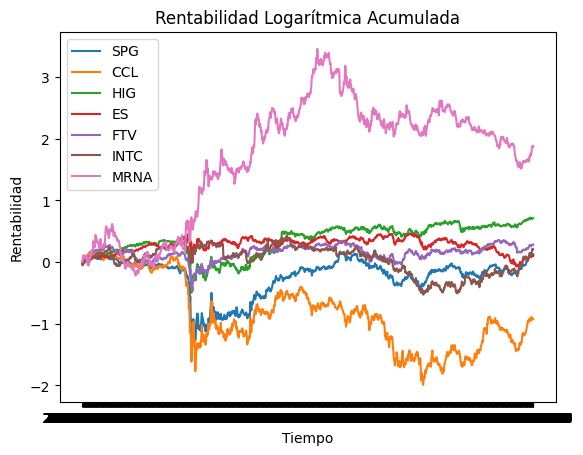

In [ ]:
rent_log_acum= rent_log_activos.cumsum()
plt.plot(rent_log_acum, label=rent_log_acum.columns)
plt.xlabel('Tiempo')
plt.ylabel('Rentabilidad')
plt.title('Rentabilidad Logarítmica Acumulada')
plt.legend(rent_log_acum.columns)
plt.show()

**3.1.Simulacion del comportamiento de 10 carteras durante un periodo de 12 meses.**
 * Establecemos el periodo y los escenarios, y generamos la rentabilidad del portfolio en ese periodo.
 * Se crea un DataFrame con los retornos futuros con las combinaciones.

In [ ]:
periodo_inicio='2021-01-01'
num_dias= 252
num_escenarios = 10
rng = np.random.default_rng(seed=11)

portfolio_ret = rent_log_activos @ w
expected_portfolio_ret_12 = portfolio_ret.mean()
expected_portfolio_std_12 = portfolio_ret.std()

future_returns = rng.normal(
    loc=expected_portfolio_ret_12,
    scale=expected_portfolio_std_12,
    size=(num_dias, num_escenarios),
)

future_returns_activos = pd.DataFrame(
    data=future_returns,
    index=pd.bdate_range(start=periodo_inicio, periods=num_dias)
)
future_returns_activos

,0,1,2,3,4,5,6,7,8,9
2021-01-01,0.000895,0.022811,0.020578,-0.008108,-0.004597,-0.008390,0.009749,-0.000598,0.012678,-0.030214
2021-01-04,0.026230,-0.001265,0.011578,-0.001929,-0.005938,0.007986,0.013962,-0.003019,-0.002197,0.011666
2021-01-05,-0.014060,-0.024709,0.006860,-0.010757,-0.031421,-0.013130,-0.007402,-0.019399,-0.024346,0.000935
2021-01-06,0.015164,-0.003525,-0.011965,0.006695,0.012188,-0.004631,0.009335,0.017572,-0.003092,-0.013121
2021-01-07,0.006077,0.004422,0.018497,-0.020909,-0.010609,-0.013529,-0.028340,0.002420,0.009056,-0.011885
...,...,...,...,...,...,...,...,...,...,...
2021-12-14,0.003712,0.023600,0.028408,0.012055,0.012853,-0.006014,-0.018081,0.010098,0.000842,0.014539
2021-12-15,-0.030156,0.044879,-0.020926,0.000846,0.016776,-0.022790,-0.008951,-0.033384,-0.023561,-0.032013
2021-12-16,0.002009,0.005177,-0.005005,0.021333,0.023421,0.000174,-0.003385,-0.004274,-0.007247,0.022063
2021-12-17,0.004264,-0.005221,-0.003475,0.009407,-0.006320,0.005556,-0.000275,0.022893,0.019640,-0.023264


**3.2.Calculamos el Var condicional de cada cartera con metodo historico.**
 * Generamos un diccionario para que guarde los resultados generados con la var y cvar.

In [ ]:
def calculate_var_cvar(returns, confidence_level=0.95):
    sorted_returns = np.sort(returns)
    var_index = int((1 - confidence_level) * len(sorted_returns))
    var = sorted_returns[var_index]
    cvar = sorted_returns[:var_index].mean()
    return var, cvar

results = {}
for column in future_returns_activos.columns:
    var, cvar = calculate_var_cvar(future_returns_activos[column], confidence_level=0.95)
    results[column] = {'VaR': var, 'CVaR': cvar}
print(f"Resultados VaR y CVaR por cartera: \n{results}")


Resultados VaR y CVaR por cartera: 
{0: {'VaR': np.float64(-0.026953830515087377), 'CVaR': np.float64(-0.03362436794491294)}, 1: {'VaR': np.float64(-0.026621616278809324), 'CVaR': np.float64(-0.03131652095085697)}, 2: {'VaR': np.float64(-0.024648589023592016), 'CVaR': np.float64(-0.03470620196852312)}, 3: {'VaR': np.float64(-0.026632043720170986), 'CVaR': np.float64(-0.03283074539536583)}, 4: {'VaR': np.float64(-0.024666256993126065), 'CVaR': np.float64(-0.029280402398399685)}, 5: {'VaR': np.float64(-0.026118933112299198), 'CVaR': np.float64(-0.03615305809843524)}, 6: {'VaR': np.float64(-0.024677559892139232), 'CVaR': np.float64(-0.033965544784067526)}, 7: {'VaR': np.float64(-0.027145544824611068), 'CVaR': np.float64(-0.03553421980700548)}, 8: {'VaR': np.float64(-0.02962636897572627), 'CVaR': np.float64(-0.03646711487169075)}, 9: {'VaR': np.float64(-0.030107077827154643), 'CVaR': np.float64(-0.037349006948837284)}}


**3.3.Calculamos la cartera con menor CVaR y mostrar sus pesos.**

In [ ]:
results_df = pd.DataFrame(results).T
best_portfolio = results_df['CVaR'].idxmax()
print(f'La cartera con el mayor CVaR es: {best_portfolio} con pesos {pesos[4]}')

La cartera con el mayor CVaR es: 4 con pesos [0.1571664  0.17533438 0.10736177 0.07325512 0.17785831 0.14452767
 0.16449634]


En este caso, la  cartera que tiene el CVaR más bajo es la 4, con un valor de -0.0333475852469095, lo que indica que, en promedio, esta cartera tiene las menores pérdidas en los peores escenarios.

Por lo tanto, la Cartera 4 sería seleccionada como la más segura en términos de riesgo de pérdidas extremas.

**3.4.Calculamos la rentabilidaded del portfolio del mayor CVaR con sus pesos para mostrar una grafica de comportamiento**

In [ ]:
n = activos_seleccionados.shape[1]
activos_seleccionados

portfolio_ret = rent_log_activos @ pesos[4]
expected_portfolio_ret = portfolio_ret.mean()
expected_portfolio_std = portfolio_ret.std()

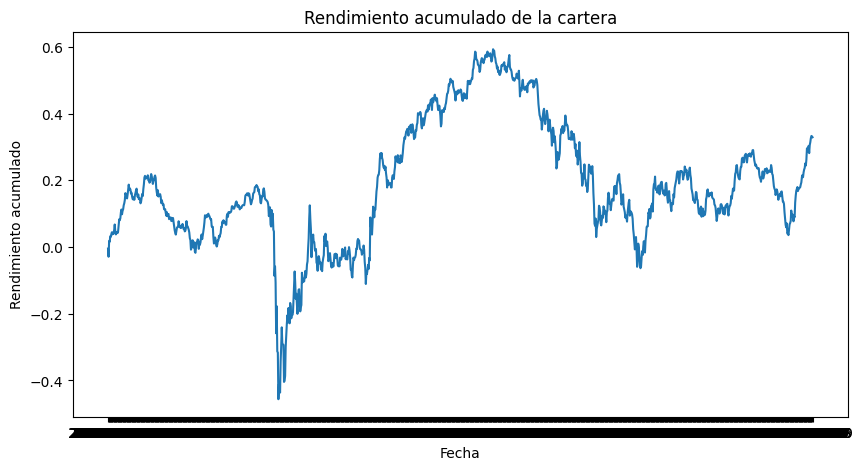

Rentabilidad media diaria = 0.0002614910435396304
Rentabilidad anualizada esperada = 0.0002614910435396304
Volatilidad = 0.019979641255088484
Volatilidad anualizada = 0.019979641255088484


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(portfolio_ret.cumsum())
plt.title("Rendimiento acumulado de la cartera")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento acumulado")
plt.show()

print(f"Rentabilidad media diaria = {expected_portfolio_ret}")
print(f"Rentabilidad anualizada esperada = {expected_portfolio_ret}")
print(f"Volatilidad = {expected_portfolio_std}")
print(f"Volatilidad anualizada = {expected_portfolio_std}")

**4.1.Simulacion de MonteCarlo**
 * Con el portfolio calculado con el menor CVaR simulamos durante un periodo de 3 meses el comportamiento de la cartera.
 * Simulamos el comportamiento con 10.000 iteraciones.
 * Graficamos para conocer el comportamiento de los escenarios.

In [ ]:
portfolio_ret = portfolio_ret[periodo_inicio:'2021-12-20',]
portfolio_ret

,0
Date,
2021-01-04,-0.013041
2021-01-05,0.000486
2021-01-06,0.029771
2021-01-07,0.006608
2021-01-08,-0.004249
...,...
2021-12-14,-0.000663
2021-12-15,0.009241
2021-12-16,-0.001427


In [ ]:
portfolio_ret = portfolio_ret[periodo_inicio:'2021-12-20',]
rng = np.random.default_rng(seed=42)

num_escenarios = 10000
num_dias = 252
future_returns = rng.normal(
    loc=expected_portfolio_ret,
    scale=expected_portfolio_std,
    size=(num_dias, num_escenarios),
)
future_returns.shape

(252, 10000)

In [ ]:
future_returns_df = pd.DataFrame(
    data=future_returns,
    index=pd.bdate_range(start='2021-12-30', periods=num_dias)
)
three_months_returns_df = future_returns_df[:'2022-03-31']

In [ ]:
portfolio_ret.shape , future_returns_df.shape

((244,), (252, 10000))

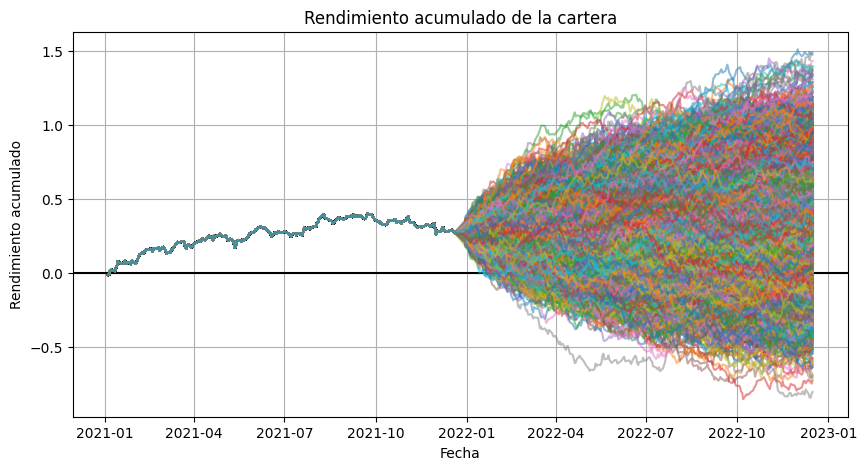

In [ ]:
portfolio_ret.index = pd.to_datetime(portfolio_ret.index)
future_returns_df.index = pd.to_datetime(future_returns_df.index)
plt.figure(figsize=(10, 5))
plt.plot(portfolio_ret.cumsum())
plt.axhline(0, color="black")
for idx in range(num_escenarios):
    plt.plot(pd.concat([portfolio_ret, future_returns_df[idx]]).cumsum(), alpha=0.5)
plt.title("Rendimiento acumulado de la cartera")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento acumulado")
plt.grid(True)
plt.show()

**4.2.Calculamos los percentiles, media y desviacion estandar durante los 3 meses calculados, de las 10.000 iteraciones de MonteCarlo.**
 * Pregunta los escenaio para saber si hay que mencionar el uso de menos por no funcionamiento

Descripción de los resultados de los retornos proyectados durante los primeros 3 meses:
Media de los retornos por escenario:
0       0.000390
1       0.002694
2       0.002729
3       0.002302
4       0.003742
          ...   
9995    0.002275
9996    0.005838
9997    0.003224
9998    0.005467
9999    0.001532
Length: 10000, dtype: float64

Desviación estándar de los retornos por escenario:
0       0.021764
1       0.019017
2       0.020431
3       0.022168
4       0.019295
          ...   
9995    0.018683
9996    0.018902
9997    0.021311
9998    0.017261
9999    0.018874
Length: 10000, dtype: float64

Percentiles 5 % y 95% de los retornos por escenario:
0      -0.032451
1      -0.027288
2      -0.028903
3      -0.034821
4      -0.025504
          ...   
9995   -0.025461
9996   -0.028332
9997   -0.030720
9998   -0.018994
9999   -0.032453
Name: 0.05, Length: 10000, dtype: float64 
Percentil 95%:
0       0.036075
1       0.031266
2       0.033818
3       0.033748
4       0.032280
     

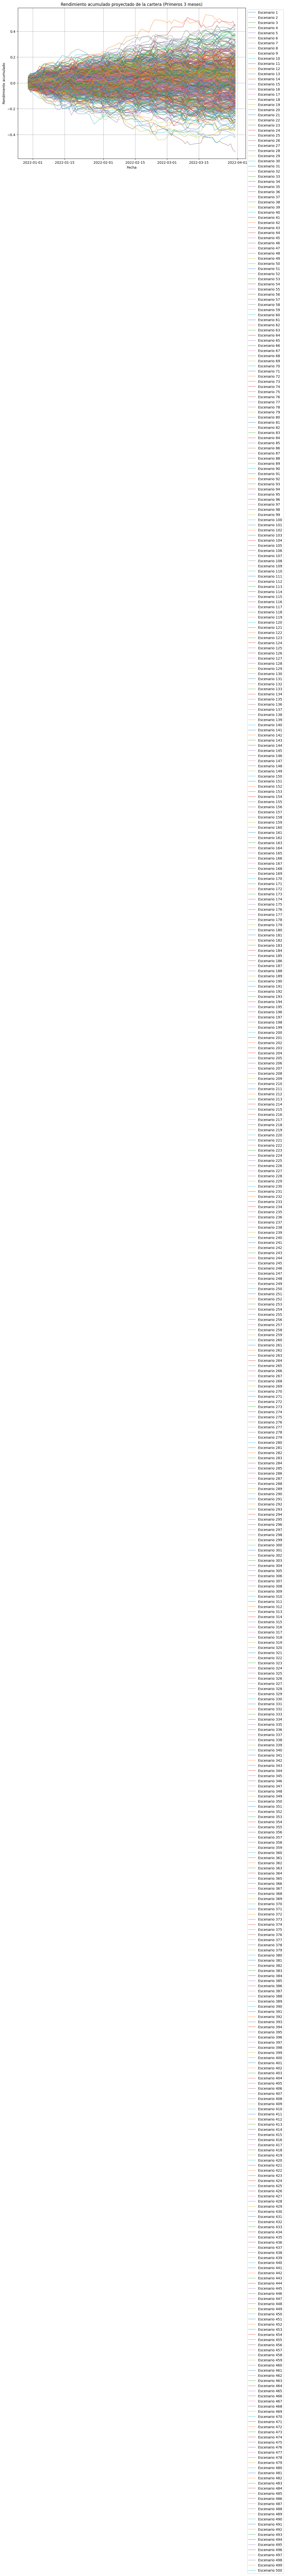

In [ ]:
mean_returns = three_months_returns_df.mean()
std_returns = three_months_returns_df.std()

percentile_5 = three_months_returns_df.quantile(0.05)
percentile_95 = three_months_returns_df.quantile(0.95)
print(f"Descripción de los resultados de los retornos proyectados durante los primeros 3 meses:\nMedia de los retornos por escenario:\n{mean_returns}")
print(f"\nDesviación estándar de los retornos por escenario:\n{std_returns}")
print(f"\nPercentiles 5 % y 95% de los retornos por escenario:\n{percentile_5} \nPercentil 95%:\n{percentile_95}")

plt.figure(figsize=(12,8))
for idx in range(min(num_escenarios, 500)):
    cumulative_returns = np.cumsum(three_months_returns_df.iloc[:, idx])
    plt.plot(three_months_returns_df.index, cumulative_returns, alpha=0.5, label=f"Escenario {idx+1}")

plt.title("Rendimiento acumulado proyectado de la cartera (Primeros 3 meses)")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento acumulado")
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()